# Exploratory data analysis (EDA)

You will learn how to systematically approach investigating an unknown dataset while maintaining a creative and open mind to search for insights.

## Context
Airbnb is an online marketplace for people to rent places to stay. 

Airbnb has rolled out a new service to help listers set prices. Airbnb makes a percentage commission off of the listings, so they are incentivized to help listers price optimally; that is, at the maximum possible point where they will still close a deal. You are an Airbnb consultant helping with this new pricing service.

## Goal

We are going to focus on a question: which features are helpful for finding out the appropriate listing price?

## Load Data

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
listings = pd.read_csv('data/airbnb_nyc.csv')

In [25]:
listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,none,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",107716952,42722.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...",none,"There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,8232441,41504.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


In [26]:
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


Please check out data dictionary [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

## Activities

**Q**: Which variables are string variables vs. numerical? Save the name of the numerical variables in a list named ```numerical_var```.

In [27]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

In [82]:
heads=list(listings[:])
heads

['id',
 'name',
 'summary',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'transit',
 'house_rules',
 'host_id',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calcul

In [28]:
numerical_vars = list(listings.select_dtypes(include=['int', 'float'], exclude=['bool']).columns)

In [29]:
numerical_vars

['id',
 'host_id',
 'host_since',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'check_in_24h',
 'air_conditioning',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 '

**Q**: Make a histogram for ```price``` variable.

<AxesSubplot:xlabel='price', ylabel='Count'>

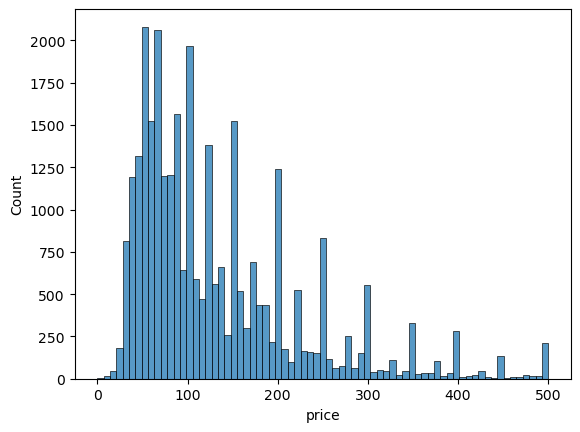

In [30]:
sns.histplot(data=listings, x='price')

**Q**: Make a histogram for ```price``` for listings that are ```long_term_stays``` vs. short-term. 

<AxesSubplot:xlabel='price', ylabel='Count'>

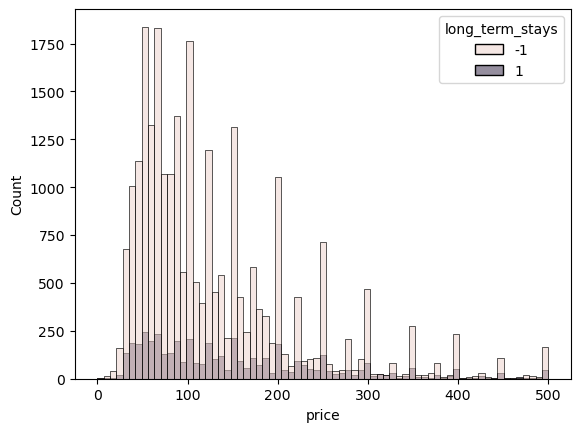

In [31]:
sns.histplot(data=listings, x='price', hue='long_term_stays')

**Q**: Can you create box plots for prices for each number of bedrooms?

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

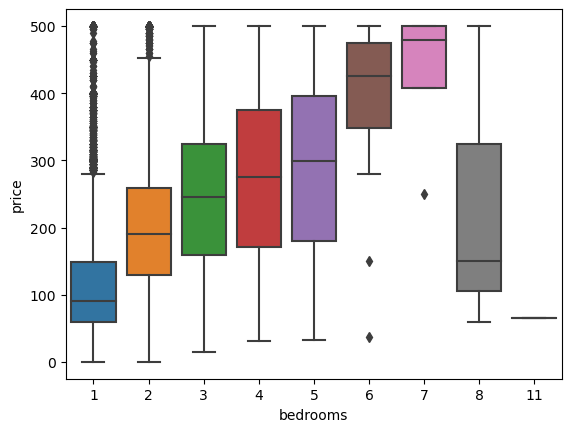

In [32]:
sns.boxplot(data=listings, x='bedrooms', y='price')

**Q**: Can you play around with other conditions to find out which listings have higher/lower prices?

In [52]:
variables= listings.loc[:, ((listings == 1) | (listings == -1)).all()]
total = variables.sum(axis=1)
price_exploration = total.to_frame(name='feature_count').join(listings['price'])

<AxesSubplot:xlabel='feature_count', ylabel='price'>

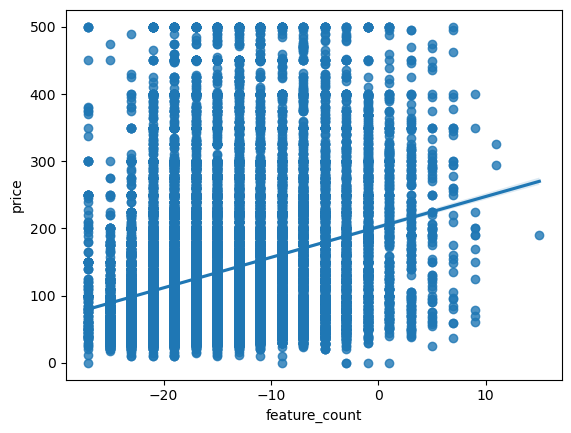

In [69]:
sns.regplot(data=price_exploration, x='feature_count', y='price')

<AxesSubplot:xlabel='feature_count', ylabel='price'>

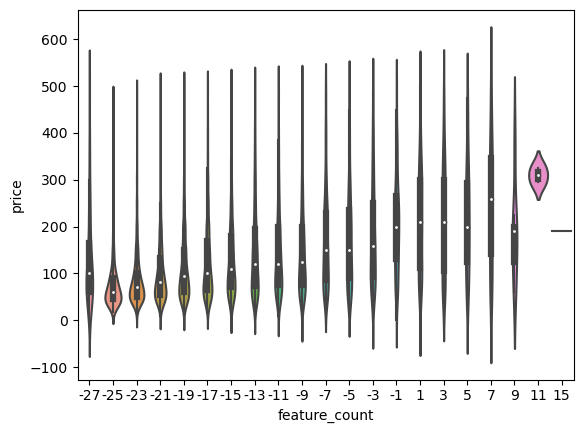

In [72]:
sns.violinplot(data=price_exploration, x='feature_count', y='price')

My conclusion is that other factors beside the number of features are correlated to price. The reporting of the amenities could be partial or misrepresented. Or it could be dependent on the amenities itself. Overall there was a slight correlation to number of features and price as can be see in the regplot, but considering the high deviation there's not a strong correlation between cumultion of features and price. If I were to explore this data more, I would isolate and examine each feature independently. But there's 29 so I won't do that today. I also did not know how to initialize 1 for number of features at -29. That is the smallest number of features they could have. I also don't know what's up with the negative pricing on the data. I guess it needs some cleaning.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

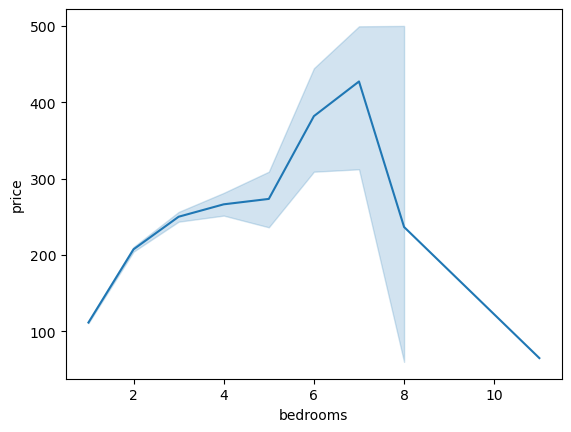

In [73]:
sns.lineplot(data=listings, y='price', x='bedrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

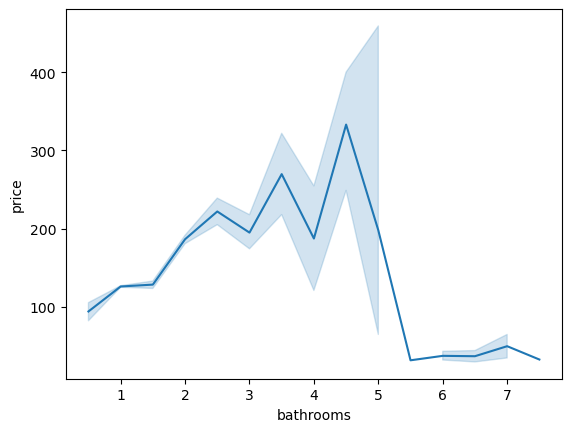

In [74]:
sns.lineplot(data=listings, y='price', x='bathrooms')

In [78]:
sns.catplot(data=listings, x='price', y='neighbourhood', kind='boxen', height=100, aspect=2)

**Q**: Can create correlation among ```price``` ```number_of_reviews``` ```review_scores_rating```?

In [87]:
corr = listings[['price', 'number_of_reviews', 'review_scores_rating']].corr()

<AxesSubplot:>

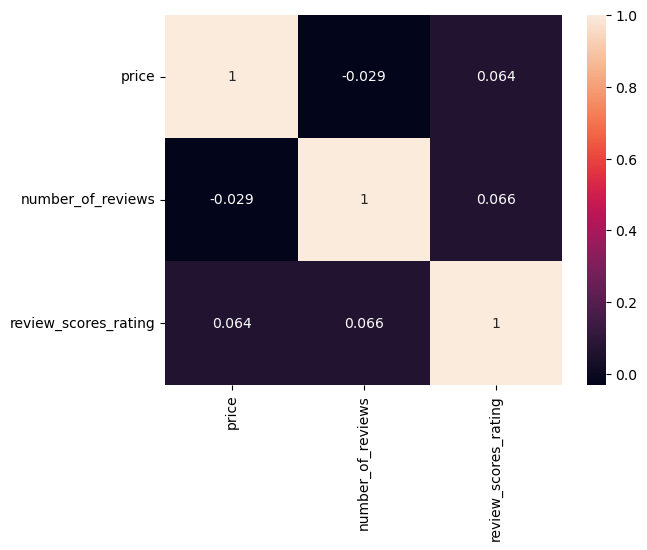

In [93]:
sns.heatmap(corr, annot=True)

**Q**: Which factors are most correlated with price (positive or negative)? Which correlations are surprising, and what do you hypothesize might explain them?

It seems as though neighborhood and number of bed and bath were the strongest factors associated with price.

## References

"New York", Inside Airbnb, http://insideairbnb.com/get-the-data.html

